In [1]:
%load_ext autoreload
%autoreload 2

from ga.ga import GaHMM
from ga.fitness import mean_log_prob_fitness, numba_mean_log_prob_fitness
from data.digits import load_dataset
from ga.selection import  rank_selection, pairwise_fittest
from ga.mutation import constant_uniform_mutation
from ga.crossover import single_point_crossover

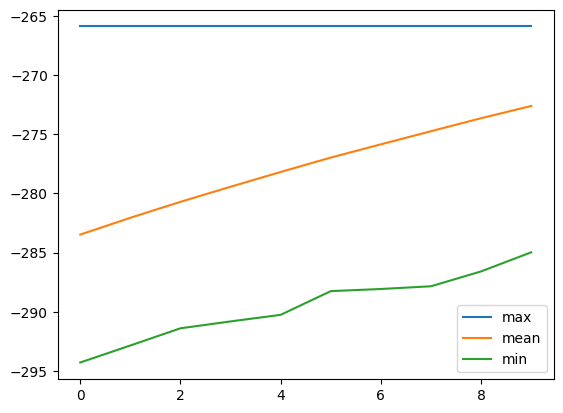

In [4]:
training_data = load_dataset(dataset='train')
digit = 0
n_samples = 12
samples = training_data[digit][:n_samples]
fitness_func = numba_mean_log_prob_fitness(samples)

mutation_chance = 0.01
crossover_rate = 0.01
# mutation_func = n_point_mutation(mutation_rate, n_mut_T=1, n_mut_E=2)
# crossover_func = n_point_crossover(crossover_rate, n_cross_T=1, n_cross_E=2)
mutation_func = constant_uniform_mutation(0)
crossover_func = single_point_crossover
parent_select_func = pairwise_fittest
gabw = GaHMM(
    n_symbols=128,
    n_states=4,
    population_size=20,
    n_generations=10,
    fitness_func=fitness_func,
    parent_select_func=parent_select_func,
    mutation_func=mutation_func,
    crossover_func=crossover_func,
    keep_elitism=1
)

gabw.start()
gabw.plot()